# Setup

In [1]:
!pip install nltk
!pip install random
!pip install spellchecker
!pip install pyspellchecker
!pip install bpe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 13.3 MB/s 
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966515 sha256=0bf8903b272e10a151f22c61a56df999ce4790d9e067bcc55ef0a5439e5d7a4a
  Stored in directory: /root/.cache/pip/wheels/58/e9/48/b82b733a7a0a9cc52ed239ccf082ff33e2fbda71670ddd3349
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7141 sha256=b4d69961bdd5a13844313376217afd0d8fb47072eef9481fb62423e72e195514
  Stored in directory: /root/.cache/pip/wheels/3c/f3/5d/77e8983e86af1c3c

# Importing important packages

In [2]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import random
from spellchecker import SpellChecker
import re
from typing import Dict, Tuple
from bpe import Encoder

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Loading dataset

In [4]:
# Loading source dataset
file_train_en = open("Data/train.en", "r")
train_en = file_train_en.read()
file_test_en = open("Data/test.en", "r")
test_en = file_test_en.read()
file_valid_en = open("Data/valid.en", "r")
valid_en = file_valid_en.read()
# Loading target dataset
file_train_fa = open("Data/train.fa", "r")
train_fa = file_train_fa.read()
file_test_fa = open("Data/test.fa", "r")
test_fa = file_test_fa.read()
file_valid_fa = open("Data/valid.fa", "r")
valid_fa = file_valid_fa.read()

# Text Pre-Processing

**0-** *BPE (Byte Pair Encoding)*

  **A-** *Implement BPE manually*

In [5]:
# Find all unique letters in the corpus
def Find_Vocabulary(Dictionary):
    Vocabulary = []
    for word in Dictionary:
        for string in word:
            Vocabulary.append(string)
    Vocabulary = list(dict.fromkeys(Vocabulary))
    Vocabulary.remove(' ')
    return Vocabulary

# Find all most frequent pairs in the corpus
def Find_Most_Frequent_Pair(My_Dictionary: Dict[str, int]) -> Dict[Tuple[str, str], int]:
    Pair = {}
    for Vocab, Frequency in My_Dictionary.items():
        Letter = Vocab.split()
        for i in range(len(Letter) - 1):
            pair = (Letter[i], Letter[i + 1])
            New_Frequency = Pair.get(pair, 0)
            Pair[pair] = New_Frequency + Frequency
    return Pair

# Merge most frequent Consecutive letters into one word
def Combine_Vocabulary(Most_Frequent_Pair: Tuple[str, str], Input_Vocabulary: Dict[str, int]) -> Dict[str, int]:
    Merged_Vocabulary = {}
    pattern = re.escape(' '.join(Most_Frequent_Pair))
    Substitution = ''.join(Most_Frequent_Pair)
    for Input_Word in Input_Vocabulary:
        Output_Word = re.sub(pattern, Substitution, Input_Word)
        Merged_Vocabulary[Output_Word] = Input_Vocabulary[Input_Word]
    return Merged_Vocabulary

  **B-** *Implement BPE using library*

In [6]:
encoder = Encoder(200, pct_bpe=0.88)  # params chosen for demonstration purposes
encoder.fit(train_en.split('\n'))

In [7]:
# Let's see an example of the first sentence in the train corpus
example = "maybe hes just gone into wahine , meggie suggested ."
print(encoder.tokenize(example))
print(next(encoder.transform([example])))
print(next(encoder.inverse_transform(encoder.transform([example]))))

['__sow', 'ma', 'y', 'be', '__eow', '__sow', 'he', 's', '__eow', '__sow', 'j', 'us', 't', '__eow', '__sow', 'go', 'ne', '__eow', '__sow', 'in', 'to', '__eow', '__sow', 'wa', 'hi', 'ne', '__eow', ',', '__sow', 'me', 'g', 'g', 'ie', '__eow', '__sow', 'su', 'g', 'ge', 'st', 'ed', '__eow', '.']
[24, 95, 42, 88, 25, 24, 14, 20, 25, 24, 169, 109, 28, 25, 24, 189, 78, 25, 24, 9, 6, 25, 24, 156, 71, 78, 25, 3, 24, 73, 40, 40, 137, 25, 24, 158, 40, 132, 59, 53, 25, 4]
maybe hes just gone into wahine , meggie suggested .


**1-** *Lowercasing*

In [8]:
# Lowercasing source dataset
train_en = train_en.lower()
test_en = test_en.lower()
valid_en = valid_en.lower()
# Lowercasing target dataset
train_fa = train_fa.lower()
test_fa = test_fa.lower()
valid_fa = valid_fa.lower()

**2-** *Remove Extra Whitespaces*

In [9]:
def remove_whitespace(text):
    return  " ".join(text.split())

# Removing Extra Whitespaces in source dataset
train_en = remove_whitespace(train_en)
test_en = remove_whitespace(test_en)
valid_en = remove_whitespace(valid_en)
# Removing Extra Whitespaces in target dataset
train_fa = remove_whitespace(train_fa)
test_fa = remove_whitespace(test_fa)
valid_fa = remove_whitespace(valid_fa)

**3-** *Tokenization*

In [10]:
# Tokenization of source dataset
train_en_token = word_tokenize(train_en)
test_en_token = word_tokenize(test_en)
valid_en_token = word_tokenize(valid_en)
# Tokenization of target dataset
train_fa_token = word_tokenize(train_fa)
test_fa_token = word_tokenize(test_fa)
valid_fa_token = word_tokenize(valid_fa)

In [11]:
# Let's take a look at some random tokens
print("Some of the english tokens at the train data set :")
print(random.choices(train_en_token, k=10))
print("Some of the persian tokens at the train data set :")
print(random.choices(train_fa_token, k=10))

Some of the english tokens at the train data set :
['-', 'pepto', 'one', 'waziristan', 'tell', 'more', 'ameliorated', ',', 'roof', 'you']
Some of the persian tokens at the train data set :
['بتوان', 'بر', 'بو', 'ترک', 'موج', 'مدیریت', 'وی', 'به', 'ترغیب', 'موفق']


**4-** *Spelling Correction*

In [5]:
def spell_check(text):
    result = []
    spell = SpellChecker()
    for word in text:
        correct_word = spell.correction(word)
        result.append(correct_word)
    return result

# Spelling Correction of source dataset
train_en_split = train_en.split() 
#train_en_Spelling_Correction = spell_check(train_en_split)
test_en_split = test_en.split() 
#test_en_Spelling_Correction = spell_check(test_en_split)
valid_en_split = valid_en.split() 
#valid_en_Spelling_Correction = spell_check(valid_en_split)
# Spelling Correction of target dataset
train_fa_split = train_fa.split() 
#train_fa_Spelling_Correction = spell_check(train_fa_split)
test_fa_split = test_fa.split() 
#test_fa_Spelling_Correction = spell_check(test_fa_split)
valid_fa_split = valid_fa.split() 
#valid_fa_Spelling_Correction = spell_check(valid_fa_split)

In [6]:
# Let's try an example of spelling correction
text = "confuson matrx".split() 
spell_check(text)

['confusion', 'matrix']

**5-** *Removal of Tags*

In [13]:
def remove_tag(text):
    text=' '.join(text)
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Removal of Tags of source dataset
train_en = remove_tag(train_en.split())
test_en = remove_tag(test_en.split())
valid_en = remove_tag(valid_en.split())
# Removal of Tags of target dataset
train_fa = remove_tag(train_fa.split())
test_fa = remove_tag(test_fa.split())
valid_fa = remove_tag(valid_fa.split())

In [14]:
# Let's see an example of "Removal of Tags"
text = "<HEAD> this is head tag </HEAD>" 
print("The input text is :")
print(text,"\n")
print("The output text after removing tags is :")
print(remove_tag(text.split()))

The input text is :
<HEAD> this is head tag </HEAD> 

The output text after removing tags is :
 this is head tag 


# OpenNMT

**OpenNMT installation**

In [15]:
!pip install OpenNMT-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.1 MB/s 
     |████████████████████████████████| 57 kB 6.2 MB/s 
     |████████████████████████████████| 16.6 MB 23.3 MB/s 
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 1.2 MB 49.2 MB/s 
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.12.0
    Uninstalling torchtext-0.12.0:
      Successfully uninstalled torchtext-0.12.0


**Config file**

In [16]:
!onmt_build_vocab -config Data/config.yaml -n_sample 100000

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-06-10 01:39:59,974 INFO] Counter vocab from 100000 samples.
[2022-06-10 01:39:59,974 INFO] Build vocab on 100000 transformed examples/corpus.
[2022-06-10 01:40:00,004 INFO] corpus_1's transforms: TransformPipe()
[2022-06-10 01:40:01,345 INFO] Counters src:33033
[2022-06-10 01:40:01,345 INFO] Counters tgt:38965


**Training**

In [ ]:
!onmt_train -config Data/config.yaml

[2022-06-09 05:23:10,750 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-06-09 05:23:10,750 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-06-09 05:23:10,750 INFO] Missing transforms field for valid data, set to default: [].
[2022-06-09 05:23:10,750 INFO] Parsed 2 corpora from -data.
[2022-06-09 05:23:10,750 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-06-09 05:23:10,750 INFO] Loading vocab from text file...
[2022-06-09 05:23:10,750 INFO] Loading src vocabulary from Data/run/example.vocab.src
[2022-06-09 05:23:10,805 INFO] Loaded src vocab has 33033 tokens.
[2022-06-09 05:23:10,819 INFO] Loading tgt vocabulary from Data/run/example.vocab.tgt
[2022-06-09 05:23:10,922 INFO] Loaded tgt vocab has 38965 tokens.
[2022-06-09 05:23:10,938 INFO] Building fields with vocab in counters...
[2022-06-09 05:23:10,989 INFO]  * tgt vocab size: 38969.
[2022-06-09 05:23:11,061 INFO]  * src vocab size: 33035

**Testing a model**

In [ ]:
!onmt_translate -model Data/run/model_step_80000.pt -src Data/test.en -output Data/pred_1000.txt -gpu 0 -verbose

[2022-06-09 08:49:09,370 INFO] Translating shard 0.
/usr/local/lib/python3.7/dist-packages/onmt/translate/beam_search.py:282: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  self._batch_index = self.topk_ids // vocab_size
[2022-06-09 08:49:09,642 INFO] 
SENT 1: ['yingluck', 'shinawatra', 'has', 'to', 'be', 'proclaimed', 'by', 'the', 'nation', "'s", 'king', 'before', 'she', 'can', 'officially', 'take', 'office', '.']
PRED 1: آیومبکوف که قبل از تحویل دادن وزیر امور خارجه این کشور به افغانستان ساخته می‌شود , باید مسئولیت یابد .
PRED SCORE: -11.3260

[2022-06-09 08:49:09,643 INFO] 
SENT 2: ['if', 'king', 'bhumibol', 'adulyadej', 'proclaims', 'her', ',', 'she', 'will

# FairSeq

**Download and import required packages**

In [17]:
!pip install 'torch>=1.6.0' editdistance matplotlib sacrebleu sacremoses sentencepiece tqdm wandb
!pip install --upgrade jupyter ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92 kB 6.0 MB/s 
     |████████████████████████████████| 880 kB 57.6 MB/s 
     |████████████████████████████████| 1.8 MB 45.7 MB/s 
     |████████████████████████████████| 181 kB 67.4 MB/s 
     |████████████████████████████████| 145 kB 65.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=dc0892c0c134c8ed4ebc5bf66b1f84869ce644fe1f38ff7bd0384c73d7be10be
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=ae2b778ee33169ab4ca5bb5402fbccf70cf08b87ab9a9bb727a2f46080ee0acb
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built sacremose

In [18]:
!git clone https://github.com/pytorch/fairseq.git
!cd fairseq && git checkout 9a1c497
!pip install --upgrade ./fairseq/

Cloning into 'fairseq'...
remote: Enumerating objects: 31538, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 31538 (delta 111), reused 128 (delta 88), pack-reused 31347
Receiving objects: 100% (31538/31538), 21.72 MiB | 28.70 MiB/s, done.
Resolving deltas: 100% (23183/23183), done.
Note: checking out '9a1c497'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 9a1c4970 Make Hydra logging work with DDP (#1568)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./fairseq
  DEPRECATION: A future pi

In [19]:
import sys
import pdb
import pprint
import logging
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data
import numpy as np
import tqdm.auto as tqdm
from pathlib import Path
from argparse import Namespace
from fairseq import utils
import matplotlib.pyplot as plt

**Fix random seed**

In [20]:
seed = 73
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  
np.random.seed(seed)  
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# Dataset Download

**Install megatools (optional)**

In [21]:
!apt-get install megatools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  megatools
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 148 kB of archives.
After this operation, 1,097 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 megatools amd64 1.9.98-1build2 [148 kB]
Fetched 148 kB in 0s (390 kB/s)
Selecting previously unselected package megatools.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../megatools_1.9.98-1build2_amd64.deb ...
Unpacking megatools (1.9.98-1build2) ...
Setting up megatools (1.9.98-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


**Download and extract**

In [23]:
# Note : In this section, we load our dataset (AFEC)
data_dir = './DATA/rawdata'
dataset_name = 'ted2020'
urls = (
    '"https://www.dropbox.com/s/spdu2yp2jz7wx7s/ted2020.zip?dl=1"', 
    '"https://www.dropbox.com/s/0097g1hfn3nmfda/test.zip?dl=1"',
)
file_names = (
    'ted2020.tgz', # train & dev
    'test.tgz', # test
)
prefix = Path(data_dir).absolute() / dataset_name
prefix.mkdir(parents=True, exist_ok=True)
for u, f in zip(urls, file_names):
    path = prefix/f
    if not path.exists():
        if 'mega' in u:
            !megadl {u} --path {path}
        else:
            !wget {u} -O {path}
    if path.suffix == ".tgz":
        !tar -xvf {path} -C {prefix}
    elif path.suffix == ".zip":
        !unzip -o {path} -d {prefix}
!mv {prefix/'raw.en'} {prefix/'train_dev.raw.en'}
!mv {prefix/'raw.zh'} {prefix/'train_dev.raw.zh'}
!mv {prefix/'test.en'} {prefix/'test.raw.en'}
!mv {prefix/'test.zh'} {prefix/'test.raw.zh'}

tar: This does not look like a tar archive
tar: Skipping to next header
gzip: stdin has more than one entry--rest ignored
tar: Child returned status 2
tar: Error is not recoverable: exiting now
tar: This does not look like a tar archive
tar: Skipping to next header
gzip: stdin has more than one entry--rest ignored
tar: Child returned status 2
tar: Error is not recoverable: exiting now


**Language**

In [24]:
src_lang = 'en'
tgt_lang = 'zh'
data_prefix = f'{prefix}/train_dev.raw'
test_prefix = f'{prefix}/test.raw'

In [25]:
!head {data_prefix+'.'+src_lang} -n 5
!head {data_prefix+'.'+tgt_lang} -n 5

maybe hes just gone into wahine , meggie suggested .
i assembled this from a corpse , remolding its flesh and bones .
the horse slipped on the wet grass
but there is a pale shade of bribery which is sometimes called prosperity .
all too soon , the hogwarts express was pulling in at platform nine and three quarters .
مگی درآمد که : شاید فقط رفته به واهاین .
اینها رو از یه جسد برداشتم و ظاهر پوست و استخوانش : می‌گوید رو عوض کردم .
اسب روی علف‌های خیس لیز می‌خورد .
اما یک نوع رشوهی دیکری هم هست که گاهی اسمش را موفقیت مالی می‌گذارند .
قطار هاگوارتز نیز زودتر از آن که انتظارش می‌رفت شروع به کم کردن سرعتش کرد و در ایستگاه نه و سه چهارم متوقف شد .


**Preprocess files**

In [26]:
import re

def strQ2B(ustring):
    """Full width -> half width"""
    # reference:https://ithelp.ithome.com.tw/articles/10233122
    ss = []
    for s in ustring:
        rstring = ""
        for uchar in s:
            inside_code = ord(uchar)
            if inside_code == 12288:  # Full width space: direct conversion
                inside_code = 32
            elif (inside_code >= 65281 and inside_code <= 65374):  # Full width chars (except space) conversion
                inside_code -= 65248
            rstring += chr(inside_code)
        ss.append(rstring)
    return ''.join(ss)
                
def clean_s(s, lang):
    if lang == 'en':
        s = re.sub(r"\([^()]*\)", "", s) # remove ([text])
        s = s.replace('-', '') # remove '-'
        s = re.sub('([.,;!?()\"])', r' \1 ', s) # keep punctuation
    elif lang == 'zh':
        s = strQ2B(s) # Q2B
        s = re.sub(r"\([^()]*\)", "", s) # remove ([text])
        s = s.replace(' ', '')
        s = s.replace('—', '')
        s = s.replace('“', '"')
        s = s.replace('”', '"')
        s = s.replace('_', '')
        s = re.sub('([。,;!?()\"~「」])', r' \1 ', s) # keep punctuation
    s = ' '.join(s.strip().split())
    return s

def len_s(s, lang):
    if lang == 'zh':
        return len(s)
    return len(s.split())

def clean_corpus(prefix, l1, l2, ratio=9, max_len=1000, min_len=1):
    if Path(f'{prefix}.clean.{l1}').exists() and Path(f'{prefix}.clean.{l2}').exists():
        print(f'{prefix}.clean.{l1} & {l2} exists. skipping clean.')
        return
    with open(f'{prefix}.{l1}', 'r') as l1_in_f:
        with open(f'{prefix}.{l2}', 'r') as l2_in_f:
            with open(f'{prefix}.clean.{l1}', 'w') as l1_out_f:
                with open(f'{prefix}.clean.{l2}', 'w') as l2_out_f:
                    for s1 in l1_in_f:
                        s1 = s1.strip()
                        s2 = l2_in_f.readline().strip()
                        s1 = clean_s(s1, l1)
                        s2 = clean_s(s2, l2)
                        s1_len = len_s(s1, l1)
                        s2_len = len_s(s2, l2)
                        if min_len > 0: # remove short sentence
                            if s1_len < min_len or s2_len < min_len:
                                continue
                        if max_len > 0: # remove long sentence
                            if s1_len > max_len or s2_len > max_len:
                                continue
                        if ratio > 0: # remove by ratio of length
                            if s1_len/s2_len > ratio or s2_len/s1_len > ratio:
                                continue
                        print(s1, file=l1_out_f)
                        print(s2, file=l2_out_f)

In [27]:
clean_corpus(data_prefix, src_lang, tgt_lang)
clean_corpus(test_prefix, src_lang, tgt_lang, ratio=-1, min_len=-1, max_len=-1)

In [28]:
!head {data_prefix+'.clean.'+src_lang} -n 5
!head {data_prefix+'.clean.'+tgt_lang} -n 5

maybe hes just gone into wahine , meggie suggested .
i assembled this from a corpse , remolding its flesh and bones .
the horse slipped on the wet grass
but there is a pale shade of bribery which is sometimes called prosperity .
all too soon , the hogwarts express was pulling in at platform nine and three quarters .
مگیدرآمدکه:شایدفقطرفتهبهواهاین.
اینهاروازیهجسدبرداشتموظاهرپوستواستخوانش:می‌گویدروعوضکردم.
اسبرویعلف‌هایخیسلیزمی‌خورد.
امایکنوعرشوهیدیکریهمهستکهگاهیاسمشراموفقیتمالیمی‌گذارند.
قطارهاگوارتزنیززودترازآنکهانتظارشمی‌رفتشروعبهکمکردنسرعتشکردودرایستگاهنهوسهچهارممتوقفشد.


**Split into train/valid**

In [29]:
# Note : we have already splitted our dataset
valid_ratio = 0.01 # 3000~4000 would suffice
train_ratio = 1 - valid_ratio

In [30]:
if (prefix/f'train.clean.{src_lang}').exists() \
and (prefix/f'train.clean.{tgt_lang}').exists() \
and (prefix/f'valid.clean.{src_lang}').exists() \
and (prefix/f'valid.clean.{tgt_lang}').exists():
    print(f'train/valid splits exists. skipping split.')
else:
    line_num = sum(1 for line in open(f'{data_prefix}.clean.{src_lang}'))
    labels = list(range(line_num))
    random.shuffle(labels)
    for lang in [src_lang, tgt_lang]:
        train_f = open(os.path.join(data_dir, dataset_name, f'train.clean.{lang}'), 'w')
        valid_f = open(os.path.join(data_dir, dataset_name, f'valid.clean.{lang}'), 'w')
        count = 0
        for line in open(f'{data_prefix}.clean.{lang}', 'r'):
            if labels[count]/line_num < train_ratio:
                train_f.write(line)
            else:
                valid_f.write(line)
            count += 1
        train_f.close()
        valid_f.close()

## Subword Units 
Out of vocabulary (OOV) has been a major problem in machine translation. This can be alleviated by using subword units.
- We will use the sentencepiece package
- select 'unigram' or 'byte-pair encoding (BPE)' algorithm

In [31]:
import sentencepiece as spm
vocab_size = 8000
if (prefix/f'spm{vocab_size}.model').exists():
    print(f'{prefix}/spm{vocab_size}.model exists. skipping spm_train.')
else:
    spm.SentencePieceTrainer.train(
        input=','.join([f'{prefix}/train.clean.{src_lang}',
                        f'{prefix}/valid.clean.{src_lang}',
                        f'{prefix}/train.clean.{tgt_lang}',
                        f'{prefix}/valid.clean.{tgt_lang}']),
        model_prefix=prefix/f'spm{vocab_size}',
        vocab_size=vocab_size,
        character_coverage=1,
        model_type='unigram', # 'bpe' works as well
        input_sentence_size=1e6,
        shuffle_input_sentence=True,
        normalization_rule_name='nmt_nfkc_cf',
    )

In [32]:
spm_model = spm.SentencePieceProcessor(model_file=str(prefix/f'spm{vocab_size}.model'))
in_tag = {
    'train': 'train.clean',
    'valid': 'valid.clean',
    'test': 'test.raw.clean',
}
for split in ['train', 'valid', 'test']:
    for lang in [src_lang, tgt_lang]:
        out_path = prefix/f'{split}.{lang}'
        if out_path.exists():
            print(f"{out_path} exists. skipping spm_encode.")
        else:
            with open(prefix/f'{split}.{lang}', 'w') as out_f:
                with open(prefix/f'{in_tag[split]}.{lang}', 'r') as in_f:
                    for line in in_f:
                        line = line.strip()
                        tok = spm_model.encode(line, out_type=str)
                        print(' '.join(tok), file=out_f)

In [33]:
!head {data_dir+'/'+dataset_name+'/train.'+src_lang} -n 5
!head {data_dir+'/'+dataset_name+'/train.'+tgt_lang} -n 5

▁maybe ▁he s ▁just ▁gone ▁into ▁wa h ine ▁, ▁meggie ▁suggested ▁.
▁i ▁assembl ed ▁this ▁from ▁a ▁corps e ▁, ▁re mo ld ing ▁its ▁flesh ▁and ▁bones ▁.
▁the ▁horse ▁slipp ed ▁on ▁the ▁we t ▁grass
▁all ▁too ▁soon ▁, ▁the ▁ho g war t s ▁express ▁was ▁pull ing ▁in ▁at ▁ pla t for m ▁nine ▁and ▁three ▁quarter s ▁.
▁for ▁this ▁purpose ▁, ▁scientific ▁information ▁of ▁iranian ▁origin ▁in ▁form ▁of ▁article s ▁deal ing ▁with ▁basic ▁science s ▁, ▁were ▁extract ed ▁. ▁iran ▁' s ▁position ha s ▁been ▁compar ed ▁with ▁the ▁rest ▁of ▁the ▁world
▁ م گی درآمد که : شاید فقط رفته به وا ه این .
▁این ها رو از یه جسد برداشت مو ظاهر پوست و است خوان ش : می ▁گوید رو عوض کردم .
▁ اسب روی علف ▁های خ یس لیز می ▁خورد .
▁ قطار ها گو ارت ز نیز زودتر ازآن که انتظار شمی ▁رفت شروعبه کم کردن سرعت ش کردو در ایستگاه نه و سه چهار م متوقف شد .
▁برای این منظور تولید اطلاعات عل می ایران یان در قالب م قا لا تو درزمینه علوم پایه از ▁" ▁ ن مایه ▁نامه است نا دی علوم ▁" ▁ استخراج ▁شدهو وضعیت ایران با جهان مقایسه شده ▁است .


**Binarize the data with fairseq**

In [34]:
binpath = Path('./DATA/data-bin', dataset_name)
if binpath.exists():
    print(binpath, "exists, will not overwrite!")
else:
    !python -m fairseq_cli.preprocess \
        --source-lang {src_lang}\
        --target-lang {tgt_lang}\
        --trainpref {prefix/'train'}\
        --validpref {prefix/'valid'}\
        --testpref {prefix/'test'}\
        --destdir {binpath}\
        --joined-dictionary\
        --workers 2

2022-06-10 01:47:49 | INFO | fairseq_cli.preprocess | Namespace(align_suffix=None, alignfile=None, all_gather_list_size=16384, azureml_logging=False, bf16=False, bpe=None, cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='DATA/data-bin/ted2020', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=True, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer=None, padding_factor=8, profile=False, quantization_config_path=None, reset_logging=False, scoring='bleu', seed=1, source_lang='en', srcdict=None, suppress_crashes=False, target_lang='zh', task='translation', tensorboard_logdir=None, testpref='/content/DATA/rawdata/ted2020/test', tgtdict=None, threshold_loss_scale=None, thresholdsrc=0, t

**Configuration for Experiments**

In [35]:
config = Namespace(
    datadir = "./DATA/data-bin/ted2020",
    savedir = "./checkpoints/rnn",
    source_lang = "en",
    target_lang = "zh",
    
    # cpu threads when fetching & processing data.
    num_workers=2,  
    # batch size in terms of tokens. gradient accumulation increases the effective batchsize.
    max_tokens=8192,
    accum_steps=2,
    
    # the lr s calculated from Noam lr scheduler. you can tune the maximum lr by this factor.
    lr_factor=2.,
    lr_warmup=4000,
    
    # clipping gradient norm helps alleviate gradient exploding
    clip_norm=1.0,
    
    # maximum epochs for training
    max_epoch=30,
    start_epoch=1,
    
    # beam size for beam search
    beam=5, 
    # generate sequences of maximum length ax + b, where x is the source length
    max_len_a=1.2, 
    max_len_b=10, 
    # when decoding, post process sentence by removing sentencepiece symbols and jieba tokenization.
    post_process = "sentencepiece",
    
    # checkpoints
    keep_last_epochs=5,
    resume=None, # if resume from checkpoint name (under config.savedir)
    
    # logging
    use_wandb=False,
)

# Logging
- logging package logs ordinary messages
- wandb logs the loss, bleu, etc. in the training process

In [36]:
logging.basicConfig(
    format="%(asctime)s | %(levelname)s | %(name)s | %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
    level="INFO", # "DEBUG" "WARNING" "ERROR"
    stream=sys.stdout,
)
proj = "hw5.seq2seq"
logger = logging.getLogger(proj)
if config.use_wandb:
    import wandb
    wandb.init(project=proj, name=Path(config.savedir).stem, config=config)

**CUDA Environment**

In [37]:
cuda_env = utils.CudaEnvironment()
utils.CudaEnvironment.pretty_print_cuda_env_list([cuda_env])
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

2022-06-10 01:48:20 | INFO | fairseq.utils | ***********************CUDA enviroments for all 1 workers***********************
2022-06-10 01:48:20 | INFO | fairseq.utils | rank   0: capabilities =  7.5  ; total memory = 14.756 GB ; name = Tesla T4                                
2022-06-10 01:48:20 | INFO | fairseq.utils | ***********************CUDA enviroments for all 1 workers***********************


**Dataloading**

In [38]:
from fairseq.tasks.translation import TranslationConfig, TranslationTask

## setup task
task_cfg = TranslationConfig(
    data=config.datadir,
    source_lang=config.source_lang,
    target_lang=config.target_lang,
    train_subset="train",
    required_seq_len_multiple=8,
    dataset_impl="mmap",
    upsample_primary=1,
)
task = TranslationTask.setup_task(task_cfg)

2022-06-10 01:48:29 | INFO | fairseq.tasks.translation | [en] dictionary: 8000 types
2022-06-10 01:48:29 | INFO | fairseq.tasks.translation | [zh] dictionary: 8000 types


In [39]:
logger.info("loading data for epoch 1")
task.load_dataset(split="train", epoch=1, combine=True) # combine if you have back-translation data.
task.load_dataset(split="valid", epoch=1)

2022-06-10 01:48:34 | INFO | hw5.seq2seq | loading data for epoch 1
2022-06-10 01:48:34 | INFO | fairseq.data.data_utils | loaded 29,463 examples from: ./DATA/data-bin/ted2020/train.en-zh.en
2022-06-10 01:48:34 | INFO | fairseq.data.data_utils | loaded 29,463 examples from: ./DATA/data-bin/ted2020/train.en-zh.zh
2022-06-10 01:48:34 | INFO | fairseq.tasks.translation | ./DATA/data-bin/ted2020 train en-zh 29463 examples
2022-06-10 01:48:34 | INFO | fairseq.data.data_utils | loaded 297 examples from: ./DATA/data-bin/ted2020/valid.en-zh.en
2022-06-10 01:48:34 | INFO | fairseq.data.data_utils | loaded 297 examples from: ./DATA/data-bin/ted2020/valid.en-zh.zh
2022-06-10 01:48:34 | INFO | fairseq.tasks.translation | ./DATA/data-bin/ted2020 valid en-zh 297 examples


In [40]:
sample = task.dataset("valid")[1]
pprint.pprint(sample)
pprint.pprint(
    "Source: " + \
    task.source_dictionary.string(
        sample['source'],
        config.post_process,
    )
)
pprint.pprint(
    "Target: " + \
    task.target_dictionary.string(
        sample['target'],
        config.post_process,
    )
)

{'id': 1,
 'source': tensor([2290,  317, 2414,   47,    2]),
 'target': tensor([   5,  763,  741, 5936,   47,    2])}
'Source: vulgar ?'
'Target: بدسلیقه ?'


**Dataset Iterator**

In [41]:
def load_data_iterator(task, split, epoch=1, max_tokens=4000, num_workers=1, cached=True):
    batch_iterator = task.get_batch_iterator(
        dataset=task.dataset(split),
        max_tokens=max_tokens,
        max_sentences=None,
        max_positions=utils.resolve_max_positions(
            task.max_positions(),
            max_tokens,
        ),
        ignore_invalid_inputs=True,
        seed=seed,
        num_workers=num_workers,
        epoch=epoch,
        disable_iterator_cache=not cached,
        # Set this to False to speed up. However, if set to False, changing max_tokens beyond 
        # first call of this method has no effect. 
    )
    return batch_iterator

demo_epoch_obj = load_data_iterator(task, "valid", epoch=1, max_tokens=20, num_workers=1, cached=False)
demo_iter = demo_epoch_obj.next_epoch_itr(shuffle=True)
sample = next(demo_iter)
sample

2022-06-10 01:48:52 | WARNING | fairseq.tasks.fairseq_task | 135 samples have invalid sizes and will be skipped, max_positions=(20, 20), first few sample ids=[178, 65, 280, 236, 193, 16, 278, 120, 25, 206]


{'id': tensor([283]),
 'net_input': {'prev_output_tokens': tensor([[   2,  149, 4251, 6835,   14, 2232,   52, 1621, 1763, 1233,   75,    1,
              1,    1,    1,    1]]),
  'src_lengths': tensor([12]),
  'src_tokens': tensor([[  1,   1,   1,   1,  27,  23, 292, 820,  67,  75,  26, 857, 317, 570,
             8,   2]])},
 'nsentences': 1,
 'ntokens': 11,
 'target': tensor([[ 149, 4251, 6835,   14, 2232,   52, 1621, 1763, 1233,   75,    2,    1,
             1,    1,    1,    1]])}

**Model Architecture**
* We again inherit fairseq's encoder, decoder and model, so that in the testing phase we can directly leverage fairseq's beam search decoder.

In [42]:
from fairseq.models import (
    FairseqEncoder, 
    FairseqIncrementalDecoder,
    FairseqEncoderDecoderModel
)

**Encoder**

In [43]:
class RNNEncoder(FairseqEncoder):
    def __init__(self, args, dictionary, embed_tokens):
        super().__init__(dictionary)
        self.embed_tokens = embed_tokens
        
        self.embed_dim = args.encoder_embed_dim
        self.hidden_dim = args.encoder_ffn_embed_dim
        self.num_layers = args.encoder_layers
        
        self.dropout_in_module = nn.Dropout(args.dropout)
        self.rnn = nn.GRU(
            self.embed_dim, 
            self.hidden_dim, 
            self.num_layers, 
            dropout=args.dropout, 
            batch_first=False, 
            bidirectional=True
        )
        self.dropout_out_module = nn.Dropout(args.dropout)
        
        self.padding_idx = dictionary.pad()
        
    def combine_bidir(self, outs, bsz: int):
        out = outs.view(self.num_layers, 2, bsz, -1).transpose(1, 2).contiguous()
        return out.view(self.num_layers, bsz, -1)

    def forward(self, src_tokens, **unused):
        bsz, seqlen = src_tokens.size()
        
        # get embeddings
        x = self.embed_tokens(src_tokens)
        x = self.dropout_in_module(x)

        # B x T x C -> T x B x C
        x = x.transpose(0, 1)
        
        # pass thru bidirectional RNN
        h0 = x.new_zeros(2 * self.num_layers, bsz, self.hidden_dim)
        x, final_hiddens = self.rnn(x, h0)
        outputs = self.dropout_out_module(x)
        # outputs = [sequence len, batch size, hid dim * directions]
        # hidden =  [num_layers * directions, batch size  , hid dim]
        
        # Since Encoder is bidirectional, we need to concatenate the hidden states of two directions
        final_hiddens = self.combine_bidir(final_hiddens, bsz)
        # hidden =  [num_layers x batch x num_directions*hidden]
        
        encoder_padding_mask = src_tokens.eq(self.padding_idx).t()
        return tuple(
            (
                outputs,  # seq_len x batch x hidden
                final_hiddens,  # num_layers x batch x num_directions*hidden
                encoder_padding_mask,  # seq_len x batch
            )
        )
    
    def reorder_encoder_out(self, encoder_out, new_order):
        # This is used by fairseq's beam search. How and why is not particularly important here.
        return tuple(
            (
                encoder_out[0].index_select(1, new_order),
                encoder_out[1].index_select(1, new_order),
                encoder_out[2].index_select(1, new_order),
            )
        )

**Attention**

In [44]:
class AttentionLayer(nn.Module):
    def __init__(self, input_embed_dim, source_embed_dim, output_embed_dim, bias=False):
        super().__init__()

        self.input_proj = nn.Linear(input_embed_dim, source_embed_dim, bias=bias)
        self.output_proj = nn.Linear(
            input_embed_dim + source_embed_dim, output_embed_dim, bias=bias
        )

    def forward(self, inputs, encoder_outputs, encoder_padding_mask):
        # inputs: T, B, dim
        # encoder_outputs: S x B x dim
        # padding mask:  S x B
        
        # convert all to batch first
        inputs = inputs.transpose(1,0) # B, T, dim
        encoder_outputs = encoder_outputs.transpose(1,0) # B, S, dim
        encoder_padding_mask = encoder_padding_mask.transpose(1,0) # B, S
        
        # project to the dimensionality of encoder_outputs
        x = self.input_proj(inputs)

        # compute attention
        # (B, T, dim) x (B, dim, S) = (B, T, S)
        attn_scores = torch.bmm(x, encoder_outputs.transpose(1,2))

        # cancel the attention at positions corresponding to padding
        if encoder_padding_mask is not None:
            # leveraging broadcast  B, S -> (B, 1, S)
            encoder_padding_mask = encoder_padding_mask.unsqueeze(1)
            attn_scores = (
                attn_scores.float()
                .masked_fill_(encoder_padding_mask, float("-inf"))
                .type_as(attn_scores)
            )  # FP16 support: cast to float and back

        # softmax on the dimension corresponding to source sequence
        attn_scores = F.softmax(attn_scores, dim=-1)

        # shape (B, T, S) x (B, S, dim) = (B, T, dim) weighted sum
        x = torch.bmm(attn_scores, encoder_outputs)

        # (B, T, dim)
        x = torch.cat((x, inputs), dim=-1)
        x = torch.tanh(self.output_proj(x)) # concat + linear + tanh
        
        # restore shape (B, T, dim) -> (T, B, dim)
        return x.transpose(1,0), attn_scores

**Decoder**

In [45]:
class RNNDecoder(FairseqIncrementalDecoder):
    def __init__(self, args, dictionary, embed_tokens):
        super().__init__(dictionary)
        self.embed_tokens = embed_tokens
        
        assert args.decoder_layers == args.encoder_layers, f"""seq2seq rnn requires that encoder 
        and decoder have same layers of rnn. got: {args.encoder_layers, args.decoder_layers}"""
        assert args.decoder_ffn_embed_dim == args.encoder_ffn_embed_dim*2, f"""seq2seq-rnn requires 
        that decoder hidden to be 2*encoder hidden dim. got: {args.decoder_ffn_embed_dim, args.encoder_ffn_embed_dim*2}"""
        
        self.embed_dim = args.decoder_embed_dim
        self.hidden_dim = args.decoder_ffn_embed_dim
        self.num_layers = args.decoder_layers
        
        
        self.dropout_in_module = nn.Dropout(args.dropout)
        self.rnn = nn.GRU(
            self.embed_dim, 
            self.hidden_dim, 
            self.num_layers, 
            dropout=args.dropout, 
            batch_first=False, 
            bidirectional=False
        )
        self.attention = AttentionLayer(
            self.embed_dim, self.hidden_dim, self.embed_dim, bias=False
        ) 
        # self.attention = None
        self.dropout_out_module = nn.Dropout(args.dropout)
        
        if self.hidden_dim != self.embed_dim:
            self.project_out_dim = nn.Linear(self.hidden_dim, self.embed_dim)
        else:
            self.project_out_dim = None
        
        if args.share_decoder_input_output_embed:
            self.output_projection = nn.Linear(
                self.embed_tokens.weight.shape[1],
                self.embed_tokens.weight.shape[0],
                bias=False,
            )
            self.output_projection.weight = self.embed_tokens.weight
        else:
            self.output_projection = nn.Linear(
                self.output_embed_dim, len(dictionary), bias=False
            )
            nn.init.normal_(
                self.output_projection.weight, mean=0, std=self.output_embed_dim ** -0.5
            )
        
    def forward(self, prev_output_tokens, encoder_out, incremental_state=None, **unused):
        # extract the outputs from encoder
        encoder_outputs, encoder_hiddens, encoder_padding_mask = encoder_out
        # outputs:          seq_len x batch x num_directions*hidden
        # encoder_hiddens:  num_layers x batch x num_directions*encoder_hidden
        # padding_mask:     seq_len x batch
        
        if incremental_state is not None and len(incremental_state) > 0:
            # if the information from last timestep is retained, we can continue from there instead of starting from bos
            prev_output_tokens = prev_output_tokens[:, -1:]
            cache_state = self.get_incremental_state(incremental_state, "cached_state")
            prev_hiddens = cache_state["prev_hiddens"]
        else:
            # incremental state does not exist, either this is training time, or the first timestep of test time
            # prepare for seq2seq: pass the encoder_hidden to the decoder hidden states
            prev_hiddens = encoder_hiddens
        
        bsz, seqlen = prev_output_tokens.size()
        
        # embed tokens
        x = self.embed_tokens(prev_output_tokens)
        x = self.dropout_in_module(x)

        # B x T x C -> T x B x C
        x = x.transpose(0, 1)
                
        # decoder-to-encoder attention
        if self.attention is not None:
            x, attn = self.attention(x, encoder_outputs, encoder_padding_mask)
                        
        # pass thru unidirectional RNN
        x, final_hiddens = self.rnn(x, prev_hiddens)
        # outputs = [sequence len, batch size, hid dim]
        # hidden =  [num_layers * directions, batch size  , hid dim]
        x = self.dropout_out_module(x)
                
        # project to embedding size (if hidden differs from embed size, and share_embedding is True, 
        # we need to do an extra projection)
        if self.project_out_dim != None:
            x = self.project_out_dim(x)
        
        # project to vocab size
        x = self.output_projection(x)
        
        # T x B x C -> B x T x C
        x = x.transpose(1, 0)
        
        # if incremental, record the hidden states of current timestep, which will be restored in the next timestep
        cache_state = {
            "prev_hiddens": final_hiddens,
        }
        self.set_incremental_state(incremental_state, "cached_state", cache_state)
        
        return x, None
    
    def reorder_incremental_state(
        self,
        incremental_state,
        new_order,
    ):
        # This is used by fairseq's beam search. How and why is not particularly important here.
        cache_state = self.get_incremental_state(incremental_state, "cached_state")
        prev_hiddens = cache_state["prev_hiddens"]
        prev_hiddens = [p.index_select(0, new_order) for p in prev_hiddens]
        cache_state = {
            "prev_hiddens": torch.stack(prev_hiddens),
        }
        self.set_incremental_state(incremental_state, "cached_state", cache_state)
        return

**Seq2Seq**

In [46]:
class Seq2Seq(FairseqEncoderDecoderModel):
    def __init__(self, args, encoder, decoder):
        super().__init__(encoder, decoder)
        self.args = args
    
    def forward(
        self,
        src_tokens,
        src_lengths,
        prev_output_tokens,
        return_all_hiddens: bool = True,
    ):
        """
        Run the forward pass for an encoder-decoder model.
        """
        encoder_out = self.encoder(
            src_tokens, src_lengths=src_lengths, return_all_hiddens=return_all_hiddens
        )
        logits, extra = self.decoder(
            prev_output_tokens,
            encoder_out=encoder_out,
            src_lengths=src_lengths,
            return_all_hiddens=return_all_hiddens,
        )
        return logits, extra

**Model Initialization**

In [47]:
# # HINT: transformer architecture
# from fairseq.models.transformer import (
#     TransformerEncoder, 
#     TransformerDecoder,
# )

def build_model(args, task):
    """ build a model instance based on hyperparameters """
    src_dict, tgt_dict = task.source_dictionary, task.target_dictionary

    # token embeddings
    encoder_embed_tokens = nn.Embedding(len(src_dict), args.encoder_embed_dim, src_dict.pad())
    decoder_embed_tokens = nn.Embedding(len(tgt_dict), args.decoder_embed_dim, tgt_dict.pad())
    
    # encoder decoder
    # HINT: TODO: switch to TransformerEncoder & TransformerDecoder
    encoder = RNNEncoder(args, src_dict, encoder_embed_tokens)
    decoder = RNNDecoder(args, tgt_dict, decoder_embed_tokens)
    
    # sequence to sequence model
    model = Seq2Seq(args, encoder, decoder)
    
    # initialization for seq2seq model is important, requires extra handling
    def init_params(module):
        from fairseq.modules import MultiheadAttention
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=0.02)
            if module.bias is not None:
                module.bias.data.zero_()
        if isinstance(module, nn.Embedding):
            module.weight.data.normal_(mean=0.0, std=0.02)
            if module.padding_idx is not None:
                module.weight.data[module.padding_idx].zero_()
        if isinstance(module, MultiheadAttention):
            module.q_proj.weight.data.normal_(mean=0.0, std=0.02)
            module.k_proj.weight.data.normal_(mean=0.0, std=0.02)
            module.v_proj.weight.data.normal_(mean=0.0, std=0.02)
        if isinstance(module, nn.RNNBase):
            for name, param in module.named_parameters():
                if "weight" in name or "bias" in name:
                    param.data.uniform_(-0.1, 0.1)
            
    # weight initialization
    model.apply(init_params)
    return model

**Architecture Related Configuration**

In [48]:
arch_args = Namespace(
    encoder_embed_dim=256,
    encoder_ffn_embed_dim=512,
    encoder_layers=1,
    decoder_embed_dim=256,
    decoder_ffn_embed_dim=1024,
    decoder_layers=1,
    share_decoder_input_output_embed=True,
    dropout=0.3,
)

# # HINT: these patches on parameters for Transformer
# def add_transformer_args(args):
#     args.encoder_attention_heads=4
#     args.encoder_normalize_before=True
    
#     args.decoder_attention_heads=4
#     args.decoder_normalize_before=True
    
#     args.activation_fn="relu"
#     args.max_source_positions=1024
#     args.max_target_positions=1024
    
#     # patches on default parameters for Transformer (those not set above)
#     from fairseq.models.transformer import base_architecture
#     base_architecture(arch_args)

# add_transformer_args(arch_args)

In [49]:
if config.use_wandb:
    wandb.config.update(vars(arch_args))

In [50]:
model = build_model(arch_args, task)
logger.info(model)

2022-06-10 01:49:55 | INFO | hw5.seq2seq | Seq2Seq(
  (encoder): RNNEncoder(
    (embed_tokens): Embedding(8000, 256, padding_idx=1)
    (dropout_in_module): Dropout(p=0.3, inplace=False)
    (rnn): GRU(256, 512, dropout=0.3, bidirectional=True)
    (dropout_out_module): Dropout(p=0.3, inplace=False)
  )
  (decoder): RNNDecoder(
    (embed_tokens): Embedding(8000, 256, padding_idx=1)
    (dropout_in_module): Dropout(p=0.3, inplace=False)
    (rnn): GRU(256, 1024, dropout=0.3)
    (attention): AttentionLayer(
      (input_proj): Linear(in_features=256, out_features=1024, bias=False)
      (output_proj): Linear(in_features=1280, out_features=256, bias=False)
    )
    (dropout_out_module): Dropout(p=0.3, inplace=False)
    (project_out_dim): Linear(in_features=1024, out_features=256, bias=True)
    (output_projection): Linear(in_features=256, out_features=8000, bias=False)
  )
)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


**Optimization**

In [51]:
class LabelSmoothedCrossEntropyCriterion(nn.Module):
    def __init__(self, smoothing, ignore_index=None, reduce=True):
        super().__init__()
        self.smoothing = smoothing
        self.ignore_index = ignore_index
        self.reduce = reduce
    
    def forward(self, lprobs, target):
        if target.dim() == lprobs.dim() - 1:
            target = target.unsqueeze(-1)
        # nll: Negative log likelihood，the cross-entropy when target is one-hot. following line is same as F.nll_loss
        nll_loss = -lprobs.gather(dim=-1, index=target)
        #  reserve some probability for other labels. thus when calculating cross-entropy, 
        # equivalent to summing the log probs of all labels
        smooth_loss = -lprobs.sum(dim=-1, keepdim=True)
        if self.ignore_index is not None:
            pad_mask = target.eq(self.ignore_index)
            nll_loss.masked_fill_(pad_mask, 0.0)
            smooth_loss.masked_fill_(pad_mask, 0.0)
        else:
            nll_loss = nll_loss.squeeze(-1)
            smooth_loss = smooth_loss.squeeze(-1)
        if self.reduce:
            nll_loss = nll_loss.sum()
            smooth_loss = smooth_loss.sum()
        # when calculating cross-entropy, add the loss of other labels
        eps_i = self.smoothing / lprobs.size(-1)
        loss = (1.0 - self.smoothing) * nll_loss + eps_i * smooth_loss
        return loss

# generally, 0.1 is good enough
criterion = LabelSmoothedCrossEntropyCriterion(
    smoothing=0.1,
    ignore_index=task.target_dictionary.pad(),
)

In [52]:
class NoamOpt:
    "Optim wrapper that implements rate."
    def __init__(self, model_size, factor, warmup, optimizer):
        self.optimizer = optimizer
        self._step = 0
        self.warmup = warmup
        self.factor = factor
        self.model_size = model_size
        self._rate = 0
    
    @property
    def param_groups(self):
        return self.optimizer.param_groups
        
    def multiply_grads(self, c):
        """Multiplies grads by a constant *c*."""                
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is not None:
                    p.grad.data.mul_(c)
        
    def step(self):
        "Update parameters and rate"
        self._step += 1
        rate = self.rate()
        for p in self.param_groups:
            p['lr'] = rate
        self._rate = rate
        self.optimizer.step()
        
    def rate(self, step = None):
        "Implement `lrate` above"
        if step is None:
            step = self._step
        return 0 if not step else self.factor * \
            (self.model_size ** (-0.5) *
            min(step ** (-0.5), step * self.warmup ** (-1.5)))

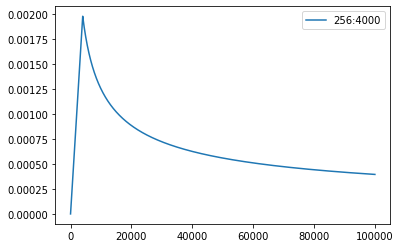

In [53]:
optimizer = NoamOpt(
    model_size=arch_args.encoder_embed_dim, 
    factor=config.lr_factor, 
    warmup=config.lr_warmup, 
    optimizer=torch.optim.AdamW(model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9, weight_decay=0.0001))
plt.plot(np.arange(1, 100000), [optimizer.rate(i) for i in range(1, 100000)])
plt.legend([f"{optimizer.model_size}:{optimizer.warmup}"])
None

**Training Procedure**

In [54]:
from fairseq.data import iterators
from torch.cuda.amp import GradScaler, autocast

def train_one_epoch(epoch_itr, model, task, criterion, optimizer, accum_steps=1):
    itr = epoch_itr.next_epoch_itr(shuffle=True)
    itr = iterators.GroupedIterator(itr, accum_steps) # gradient accumulation: update every accum_steps samples
    
    stats = {"loss": []}
    scaler = GradScaler() # automatic mixed precision (amp) 
    
    model.train()
    progress = tqdm.tqdm(itr, desc=f"train epoch {epoch_itr.epoch}", leave=False)
    for samples in progress:
        model.zero_grad()
        accum_loss = 0
        sample_size = 0
        # gradient accumulation: update every accum_steps samples
        for i, sample in enumerate(samples):
            if i == 1:
                # emptying the CUDA cache after the first step can reduce the chance of OOM
                torch.cuda.empty_cache()

            sample = utils.move_to_cuda(sample, device=device)
            target = sample["target"]
            sample_size_i = sample["ntokens"]
            sample_size += sample_size_i
            
            # mixed precision training
            with autocast():
                net_output = model.forward(**sample["net_input"])
                lprobs = F.log_softmax(net_output[0], -1)            
                loss = criterion(lprobs.view(-1, lprobs.size(-1)), target.view(-1))
                
                # logging
                accum_loss += loss.item()
                # back-prop
                scaler.scale(loss).backward()                
        
        scaler.unscale_(optimizer)
        optimizer.multiply_grads(1 / (sample_size or 1.0)) # (sample_size or 1.0) handles the case of a zero gradient
        gnorm = nn.utils.clip_grad_norm_(model.parameters(), config.clip_norm) # grad norm clipping prevents gradient exploding
        
        scaler.step(optimizer)
        scaler.update()
        
        # logging
        loss_print = accum_loss/sample_size
        stats["loss"].append(loss_print)
        progress.set_postfix(loss=loss_print)
        if config.use_wandb:
            wandb.log({
                "train/loss": loss_print,
                "train/grad_norm": gnorm.item(),
                "train/lr": optimizer.rate(),
                "train/sample_size": sample_size,
            })
        
    loss_print = np.mean(stats["loss"])
    logger.info(f"training loss: {loss_print:.4f}")
    return stats

In [55]:
# fairseq's beam search generator
# given model and input seqeunce, produce translation hypotheses by beam search
sequence_generator = task.build_generator([model], config)

def decode(toks, dictionary):
    # convert from Tensor to human readable sentence
    s = dictionary.string(
        toks.int().cpu(),
        config.post_process,
    )
    return s if s else "<unk>"

def inference_step(sample, model):
    gen_out = sequence_generator.generate([model], sample)
    srcs = []
    hyps = []
    refs = []
    for i in range(len(gen_out)):
        # for each sample, collect the input, hypothesis and reference, later be used to calculate BLEU
        srcs.append(decode(
            utils.strip_pad(sample["net_input"]["src_tokens"][i], task.source_dictionary.pad()), 
            task.source_dictionary,
        ))
        hyps.append(decode(
            gen_out[i][0]["tokens"], # 0 indicates using the top hypothesis in beam
            task.target_dictionary,
        ))
        refs.append(decode(
            utils.strip_pad(sample["target"][i], task.target_dictionary.pad()), 
            task.target_dictionary,
        ))
    return srcs, hyps, refs

In [56]:
import shutil
import sacrebleu

def validate(model, task, criterion, log_to_wandb=True):
    logger.info('begin validation')
    itr = load_data_iterator(task, "valid", 1, config.max_tokens, config.num_workers).next_epoch_itr(shuffle=False)
    
    stats = {"loss":[], "bleu": 0, "srcs":[], "hyps":[], "refs":[]}
    srcs = []
    hyps = []
    refs = []
    
    model.eval()
    progress = tqdm.tqdm(itr, desc=f"validation", leave=False)
    with torch.no_grad():
        for i, sample in enumerate(progress):
            # validation loss
            sample = utils.move_to_cuda(sample, device=device)
            net_output = model.forward(**sample["net_input"])

            lprobs = F.log_softmax(net_output[0], -1)
            target = sample["target"]
            sample_size = sample["ntokens"]
            loss = criterion(lprobs.view(-1, lprobs.size(-1)), target.view(-1)) / sample_size
            progress.set_postfix(valid_loss=loss.item())
            stats["loss"].append(loss)
            
            # do inference
            s, h, r = inference_step(sample, model)
            srcs.extend(s)
            hyps.extend(h)
            refs.extend(r)
            
    tok = 'zh' if task.cfg.target_lang == 'zh' else '13a'
    stats["loss"] = torch.stack(stats["loss"]).mean().item()
    stats["bleu"] = sacrebleu.corpus_bleu(hyps, [refs], tokenize=tok) # 計算BLEU score
    stats["srcs"] = srcs
    stats["hyps"] = hyps
    stats["refs"] = refs
    
    if config.use_wandb and log_to_wandb:
        wandb.log({
            "valid/loss": stats["loss"],
            "valid/bleu": stats["bleu"].score,
        }, commit=False)
    
    showid = np.random.randint(len(hyps))
    logger.info("example source: " + srcs[showid])
    logger.info("example hypothesis: " + hyps[showid])
    logger.info("example reference: " + refs[showid])
    
    # show bleu results
    logger.info(f"validation loss:\t{stats['loss']:.4f}")
    logger.info(stats["bleu"].format())
    return stats

**Save and Load Model Weights**

In [57]:
def validate_and_save(model, task, criterion, optimizer, epoch, save=True):   
    stats = validate(model, task, criterion)
    bleu = stats['bleu']
    loss = stats['loss']
    if save:
        # save epoch checkpoints
        savedir = Path(config.savedir).absolute()
        savedir.mkdir(parents=True, exist_ok=True)
        
        check = {
            "model": model.state_dict(),
            "stats": {"bleu": bleu.score, "loss": loss},
            "optim": {"step": optimizer._step}
        }
        torch.save(check, savedir/f"checkpoint{epoch}.pt")
        shutil.copy(savedir/f"checkpoint{epoch}.pt", savedir/f"checkpoint_last.pt")
        logger.info(f"saved epoch checkpoint: {savedir}/checkpoint{epoch}.pt")
    
        # save epoch samples
        with open(savedir/f"samples{epoch}.{config.source_lang}-{config.target_lang}.txt", "w") as f:
            for s, h in zip(stats["srcs"], stats["hyps"]):
                f.write(f"{s}\t{h}\n")

        # get best valid bleu    
        if getattr(validate_and_save, "best_bleu", 0) < bleu.score:
            validate_and_save.best_bleu = bleu.score
            torch.save(check, savedir/f"checkpoint_best.pt")
            
        del_file = savedir / f"checkpoint{epoch - config.keep_last_epochs}.pt"
        if del_file.exists():
            del_file.unlink()
    
    return stats

def try_load_checkpoint(model, optimizer=None, name=None):
    name = name if name else "checkpoint_last.pt"
    checkpath = Path(config.savedir)/name
    if checkpath.exists():
        check = torch.load(checkpath)
        model.load_state_dict(check["model"])
        stats = check["stats"]
        step = "unknown"
        if optimizer != None:
            optimizer._step = step = check["optim"]["step"]
        logger.info(f"loaded checkpoint {checkpath}: step={step} loss={stats['loss']} bleu={stats['bleu']}")
    else:
        logger.info(f"no checkpoints found at {checkpath}!")

**Main**


**Training loop**

In [58]:
model = model.to(device=device)
criterion = criterion.to(device=device)

In [59]:
!nvidia-smi

Fri Jun 10 01:51:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    27W /  70W |   1320MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [60]:
logger.info("task: {}".format(task.__class__.__name__))
logger.info("encoder: {}".format(model.encoder.__class__.__name__))
logger.info("decoder: {}".format(model.decoder.__class__.__name__))
logger.info("criterion: {}".format(criterion.__class__.__name__))
logger.info("optimizer: {}".format(optimizer.__class__.__name__))
logger.info(
    "num. model params: {:,} (num. trained: {:,})".format(
        sum(p.numel() for p in model.parameters()),
        sum(p.numel() for p in model.parameters() if p.requires_grad),
    )
)
logger.info(f"max tokens per batch = {config.max_tokens}, accumulate steps = {config.accum_steps}")

2022-06-10 01:51:19 | INFO | hw5.seq2seq | task: TranslationTask
2022-06-10 01:51:19 | INFO | hw5.seq2seq | encoder: RNNEncoder
2022-06-10 01:51:19 | INFO | hw5.seq2seq | decoder: RNNDecoder
2022-06-10 01:51:19 | INFO | hw5.seq2seq | criterion: LabelSmoothedCrossEntropyCriterion
2022-06-10 01:51:19 | INFO | hw5.seq2seq | optimizer: NoamOpt
2022-06-10 01:51:19 | INFO | hw5.seq2seq | num. model params: 11,251,968 (num. trained: 11,251,968)
2022-06-10 01:51:19 | INFO | hw5.seq2seq | max tokens per batch = 8192, accumulate steps = 2


In [61]:
epoch_itr = load_data_iterator(task, "train", config.start_epoch, config.max_tokens, config.num_workers)
try_load_checkpoint(model, optimizer, name=config.resume)
while epoch_itr.next_epoch_idx <= config.max_epoch:
    # train for one epoch
    train_one_epoch(epoch_itr, model, task, criterion, optimizer, config.accum_steps)
    stats = validate_and_save(model, task, criterion, optimizer, epoch=epoch_itr.epoch)
    logger.info("end of epoch {}".format(epoch_itr.epoch))    
    epoch_itr = load_data_iterator(task, "train", epoch_itr.next_epoch_idx, config.max_tokens, config.num_workers)

2022-06-10 01:51:49 | INFO | hw5.seq2seq | no checkpoints found at checkpoints/rnn/checkpoint_last.pt!


train epoch 1:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:51:58 | INFO | hw5.seq2seq | training loss: 8.9502
2022-06-10 01:51:58 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/fairseq/search.py:140: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  beams_buf = indices_buf // vocab_size
/usr/local/lib/python3.7/dist-packages/fairseq/sequence_generator.py:657: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  unfin_idx = idx // beam_size


2022-06-10 01:52:00 | INFO | hw5.seq2seq | example source: all that poor harriet would be suffering
2022-06-10 01:52:00 | INFO | hw5.seq2seq | example hypothesis: <unk>
2022-06-10 01:52:00 | INFO | hw5.seq2seq | example reference: طفلکیهریتچهناراحتیوعذابیخواهدکشید ,
2022-06-10 01:52:00 | INFO | hw5.seq2seq | validation loss:	8.8026
2022-06-10 01:52:00 | INFO | hw5.seq2seq | BLEU = 0.00 0.0/0.0/0.0/0.0 (BP = 0.591 ratio = 0.655 hyp_len = 891 ref_len = 1360)
2022-06-10 01:52:00 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint1.pt
2022-06-10 01:52:00 | INFO | hw5.seq2seq | end of epoch 1


train epoch 2:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:52:10 | INFO | hw5.seq2seq | training loss: 8.2803
2022-06-10 01:52:10 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:52:11 | INFO | hw5.seq2seq | example source: consumer control and privacy requires permission to be sought to send mobile content that the recipient will be interested in .
2022-06-10 01:52:11 | INFO | hw5.seq2seq | example hypothesis: <unk>
2022-06-10 01:52:11 | INFO | hw5.seq2seq | example reference: بهمنظورکنترلوحریمشخصیمصرف کنندهبایدبرایفرستادنمحتویموبایلیکهدریافت کنندهبهآنعلاقه مندباشداجازهکسبشود.
2022-06-10 01:52:11 | INFO | hw5.seq2seq | validation loss:	7.4434
2022-06-10 01:52:11 | INFO | hw5.seq2seq | BLEU = 0.00 0.0/0.0/0.0/0.0 (BP = 0.591 ratio = 0.655 hyp_len = 891 ref_len = 1360)
2022-06-10 01:52:11 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint2.pt
2022-06-10 01:52:11 | INFO | hw5.seq2seq | end of epoch 2


train epoch 3:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:52:21 | INFO | hw5.seq2seq | training loss: 7.3179
2022-06-10 01:52:21 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:52:22 | INFO | hw5.seq2seq | example source: you can " t go after him .
2022-06-10 01:52:22 | INFO | hw5.seq2seq | example hypothesis: <unk>
2022-06-10 01:52:22 | INFO | hw5.seq2seq | example reference: نمی تونیبریدنبالش.
2022-06-10 01:52:22 | INFO | hw5.seq2seq | validation loss:	7.2124
2022-06-10 01:52:22 | INFO | hw5.seq2seq | BLEU = 0.00 0.0/0.0/0.0/0.0 (BP = 0.591 ratio = 0.655 hyp_len = 891 ref_len = 1360)
2022-06-10 01:52:22 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint3.pt
2022-06-10 01:52:22 | INFO | hw5.seq2seq | end of epoch 3


train epoch 4:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:52:32 | INFO | hw5.seq2seq | training loss: 7.1964
2022-06-10 01:52:32 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:52:34 | INFO | hw5.seq2seq | example source: kyrgyzstan hopes to buy kazakh gas
2022-06-10 01:52:34 | INFO | hw5.seq2seq | example hypothesis: <unk>
2022-06-10 01:52:34 | INFO | hw5.seq2seq | example reference: قرقیزستانامیدواربهخریدگازقزاقاست
2022-06-10 01:52:34 | INFO | hw5.seq2seq | validation loss:	7.1257
2022-06-10 01:52:34 | INFO | hw5.seq2seq | BLEU = 1.02 23.6/1.1/0.6/0.4 (BP = 0.644 ratio = 0.694 hyp_len = 944 ref_len = 1360)
2022-06-10 01:52:34 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint4.pt
2022-06-10 01:52:35 | INFO | hw5.seq2seq | end of epoch 4


train epoch 5:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:52:44 | INFO | hw5.seq2seq | training loss: 7.1047
2022-06-10 01:52:44 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:52:47 | INFO | hw5.seq2seq | example source: if he starts agitating
2022-06-10 01:52:47 | INFO | hw5.seq2seq | example hypothesis: ,و..
2022-06-10 01:52:47 | INFO | hw5.seq2seq | example reference: اگرهمدستبهتبلیغاتبزنه ,
2022-06-10 01:52:47 | INFO | hw5.seq2seq | validation loss:	7.0410
2022-06-10 01:52:47 | INFO | hw5.seq2seq | BLEU = 0.72 16.9/0.7/0.3/0.1 (BP = 1.000 ratio = 1.131 hyp_len = 1538 ref_len = 1360)
2022-06-10 01:52:47 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint5.pt
2022-06-10 01:52:47 | INFO | hw5.seq2seq | end of epoch 5


train epoch 6:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:52:56 | INFO | hw5.seq2seq | training loss: 7.0262
2022-06-10 01:52:56 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:52:58 | INFO | hw5.seq2seq | example source: again , there was no direct connection between the hound and the man 's death .
2022-06-10 01:52:58 | INFO | hw5.seq2seq | example hypothesis: , , , , , , , , , , , , , , , , , , , ,...
2022-06-10 01:52:58 | INFO | hw5.seq2seq | example reference: اینبارهمهیچارتباطمستقیمیبینآنتازیومرگاینمردوجودندارد.
2022-06-10 01:52:58 | INFO | hw5.seq2seq | validation loss:	6.9869
2022-06-10 01:52:58 | INFO | hw5.seq2seq | BLEU = 0.23 7.5/0.2/0.1/0.0 (BP = 1.000 ratio = 3.587 hyp_len = 4879 ref_len = 1360)
2022-06-10 01:52:59 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint6.pt
2022-06-10 01:52:59 | INFO | hw5.seq2seq | end of epoch 6


train epoch 7:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:53:08 | INFO | hw5.seq2seq | training loss: 6.9390
2022-06-10 01:53:08 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:53:11 | INFO | hw5.seq2seq | example source: ghulam rasool , a mason from bara tehsil , khyber agency , learned in march that his 18 month old son had contracted polio and would be affected his entire , doctors said .
2022-06-10 01:53:11 | INFO | hw5.seq2seq | example hypothesis: میی ,ی , , , , , , , , , , , , , , , , , , , , , , , , , ,میمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمی
2022-06-10 01:53:11 | INFO | hw5.seq2seq | example reference: غلامرسول , بناییاهلبارهتحصیلدرخیبرپختونخوا , درماهمارسآگاهییافتکهکودک18ماهه اشبهفلج اطفالمبتلاشده استوپزشکانگفتندکهاینممکناستبرکلبدنشتاثیربگذارد.
2022-06-10 01:53:11 | INFO | hw5.seq2seq | validation loss:	6.9511
2022-06-10 01:53:11 | INFO | hw5.seq2seq | BLEU = 0.05 3.5/0.1/0.0/0.0 (BP = 1.000 ratio = 5.218 hyp_len = 7096 ref_len = 1360)
2022-06-10 01:53:11 | INFO | hw5.seq2seq | saved epoch checkpoint: /content

train epoch 8:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:53:22 | INFO | hw5.seq2seq | training loss: 6.8585
2022-06-10 01:53:22 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:53:25 | INFO | hw5.seq2seq | example source: kyrgyzstan hopes to buy kazakh gas
2022-06-10 01:53:25 | INFO | hw5.seq2seq | example hypothesis: , , , , , , ,.
2022-06-10 01:53:25 | INFO | hw5.seq2seq | example reference: قرقیزستانامیدواربهخریدگازقزاقاست
2022-06-10 01:53:25 | INFO | hw5.seq2seq | validation loss:	6.9156
2022-06-10 01:53:25 | INFO | hw5.seq2seq | BLEU = 0.03 1.8/0.0/0.0/0.0 (BP = 1.000 ratio = 9.279 hyp_len = 12620 ref_len = 1360)
2022-06-10 01:53:25 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint8.pt
2022-06-10 01:53:25 | INFO | hw5.seq2seq | end of epoch 8


train epoch 9:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:53:35 | INFO | hw5.seq2seq | training loss: 6.7895
2022-06-10 01:53:35 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:53:37 | INFO | hw5.seq2seq | example source: for , like the wardenand many others , mcmillan was against capital punishment
2022-06-10 01:53:37 | INFO | hw5.seq2seq | example hypothesis: م , می می می می می می می می می می می می می می می می می می می می شود.
2022-06-10 01:53:37 | INFO | hw5.seq2seq | example reference: مکمیلانهممانندریئسزندانوبسیاریازافراددیگر , بامجازاتمرگمخالفبود
2022-06-10 01:53:37 | INFO | hw5.seq2seq | validation loss:	6.8646
2022-06-10 01:53:37 | INFO | hw5.seq2seq | BLEU = 0.08 4.9/0.1/0.0/0.0 (BP = 1.000 ratio = 3.287 hyp_len = 4470 ref_len = 1360)
2022-06-10 01:53:38 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint9.pt
2022-06-10 01:53:38 | INFO | hw5.seq2seq | end of epoch 9


train epoch 10:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:53:48 | INFO | hw5.seq2seq | training loss: 6.7165
2022-06-10 01:53:48 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:53:51 | INFO | hw5.seq2seq | example source: so that inescapable memories would not touch any feeling .
2022-06-10 01:53:51 | INFO | hw5.seq2seq | example hypothesis: می می می می می می می می می می می می می می می کند.
2022-06-10 01:53:51 | INFO | hw5.seq2seq | example reference: تامبادااحساساتاوراجریحه دارکند.
2022-06-10 01:53:51 | INFO | hw5.seq2seq | validation loss:	6.7087
2022-06-10 01:53:51 | INFO | hw5.seq2seq | BLEU = 0.05 3.1/0.0/0.0/0.0 (BP = 1.000 ratio = 4.728 hyp_len = 6430 ref_len = 1360)
2022-06-10 01:53:51 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint10.pt
2022-06-10 01:53:51 | INFO | hw5.seq2seq | end of epoch 10


train epoch 11:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:54:00 | INFO | hw5.seq2seq | training loss: 6.6891
2022-06-10 01:54:00 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:54:03 | INFO | hw5.seq2seq | example source: so , whatever you think of creationism , and i think it 's crazy ,
2022-06-10 01:54:03 | INFO | hw5.seq2seq | example hypothesis: می گوید: " می می م , می م , می می می می می م.
2022-06-10 01:54:03 | INFO | hw5.seq2seq | example reference: وشماهرفکریدرموردخلقتگراییمی خواهیدبکنیدوالبتهمنفکرمی کنمدیوانگیاست
2022-06-10 01:54:03 | INFO | hw5.seq2seq | validation loss:	6.6633
2022-06-10 01:54:03 | INFO | hw5.seq2seq | BLEU = 0.07 5.1/0.1/0.0/0.0 (BP = 1.000 ratio = 4.393 hyp_len = 5975 ref_len = 1360)
2022-06-10 01:54:04 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint11.pt
2022-06-10 01:54:04 | INFO | hw5.seq2seq | end of epoch 11


train epoch 12:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:54:13 | INFO | hw5.seq2seq | training loss: 6.6592
2022-06-10 01:54:13 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:54:17 | INFO | hw5.seq2seq | example source: he 's dead ,
2022-06-10 01:54:17 | INFO | hw5.seq2seq | example hypothesis: می م.
2022-06-10 01:54:17 | INFO | hw5.seq2seq | example reference: مرد.
2022-06-10 01:54:17 | INFO | hw5.seq2seq | validation loss:	6.6132
2022-06-10 01:54:17 | INFO | hw5.seq2seq | BLEU = 0.05 3.4/0.1/0.0/0.0 (BP = 1.000 ratio = 5.747 hyp_len = 7816 ref_len = 1360)
2022-06-10 01:54:17 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint12.pt
2022-06-10 01:54:17 | INFO | hw5.seq2seq | end of epoch 12


train epoch 13:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:54:27 | INFO | hw5.seq2seq | training loss: 6.6233
2022-06-10 01:54:27 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:54:30 | INFO | hw5.seq2seq | example source: i got class from nine to twelve , and a meeting from two to four .
2022-06-10 01:54:30 | INFO | hw5.seq2seq | example hypothesis: می م , م , م , م , م , م.
2022-06-10 01:54:30 | INFO | hw5.seq2seq | example reference: منازنهتادوازدهکلاسدارم , وازدوتاچهارجلسهدارم.
2022-06-10 01:54:30 | INFO | hw5.seq2seq | validation loss:	6.5856
2022-06-10 01:54:30 | INFO | hw5.seq2seq | BLEU = 0.04 5.2/0.0/0.0/0.0 (BP = 1.000 ratio = 4.549 hyp_len = 6187 ref_len = 1360)
2022-06-10 01:54:30 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint13.pt
2022-06-10 01:54:30 | INFO | hw5.seq2seq | end of epoch 13


train epoch 14:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:54:39 | INFO | hw5.seq2seq | training loss: 6.5772
2022-06-10 01:54:39 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:54:42 | INFO | hw5.seq2seq | example source: by the time i reach the office , paul is grovelling on the floor as i sit nonchalantly on his desk , holding one knee
2022-06-10 01:54:42 | INFO | hw5.seq2seq | example hypothesis: می گوید: " می م , م , م , م , م , م , م , م , م , م , م , م.
2022-06-10 01:54:42 | INFO | hw5.seq2seq | example reference: وقتیبهساختمانشرکتنزدیکشدمبهذهنمآمدکهپلجلویمنزانوزدهومنکاملاخونسردوبی اعتناهستم
2022-06-10 01:54:42 | INFO | hw5.seq2seq | validation loss:	6.5572
2022-06-10 01:54:42 | INFO | hw5.seq2seq | BLEU = 0.07 6.0/0.1/0.0/0.0 (BP = 1.000 ratio = 4.368 hyp_len = 5941 ref_len = 1360)
2022-06-10 01:54:43 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint14.pt
2022-06-10 01:54:43 | INFO | hw5.seq2seq | end of epoch 14


train epoch 15:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:54:52 | INFO | hw5.seq2seq | training loss: 6.5520
2022-06-10 01:54:52 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:54:55 | INFO | hw5.seq2seq | example source: he was burning visibly
2022-06-10 01:54:55 | INFO | hw5.seq2seq | example hypothesis: می هاییییییمیمه.
2022-06-10 01:54:55 | INFO | hw5.seq2seq | example reference: بهوضوحگرگرفتهبود.
2022-06-10 01:54:55 | INFO | hw5.seq2seq | validation loss:	6.7055
2022-06-10 01:54:55 | INFO | hw5.seq2seq | BLEU = 0.12 7.6/0.2/0.0/0.0 (BP = 1.000 ratio = 2.570 hyp_len = 3495 ref_len = 1360)
2022-06-10 01:54:55 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint15.pt
2022-06-10 01:54:55 | INFO | hw5.seq2seq | end of epoch 15


train epoch 16:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:55:05 | INFO | hw5.seq2seq | training loss: 6.5315
2022-06-10 01:55:05 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:55:08 | INFO | hw5.seq2seq | example source: if the coefficient is within the limits then execution proceeds to the next command in the ? ? ? ? ? ? ? ? ? .
2022-06-10 01:55:08 | INFO | hw5.seq2seq | example hypothesis: میمی , , , ,میمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمیمی
2022-06-10 01:55:08 | INFO | hw5.seq2seq | example reference: درصورتیکهضریبدرداخلاینمحدودهباشد , اجرایفرمانتافرمانبعدیدرجدولrunادامهمی یابد.
2022-06-10 01:55:08 | INFO | hw5.seq2seq | validation loss:	6.7325
2022-06-10 01:55:08 | INFO | hw5.seq2seq | BLEU = 0.17 9.8/0.4/0.0/0.0 (BP = 1.000 ratio = 2.092 hyp_len = 2845 ref_len = 1360)
2022-06-10 01:55:08 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint16.pt
2022-06-10 01:55:08 | INFO | hw5.seq2seq | end of epoch 16


train epoch 17:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:55:18 | INFO | hw5.seq2seq | training loss: 6.5429
2022-06-10 01:55:18 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:55:21 | INFO | hw5.seq2seq | example source: ninety five percent of pensioners fall into the category of these beneficiaries " , kadyrov said .
2022-06-10 01:55:21 | INFO | hw5.seq2seq | example hypothesis: گزارش , م , م , م , م , م , م , م , م , م , م , م , م , م , م , م , م , یابد. "
2022-06-10 01:55:21 | INFO | hw5.seq2seq | example reference: نودوپنجدرصدبازنشستگانازجملهاینافرادذی نفعقرارخواهندگرفت " .
2022-06-10 01:55:21 | INFO | hw5.seq2seq | validation loss:	6.5083
2022-06-10 01:55:21 | INFO | hw5.seq2seq | BLEU = 0.09 6.7/0.2/0.0/0.0 (BP = 1.000 ratio = 3.990 hyp_len = 5426 ref_len = 1360)
2022-06-10 01:55:21 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint17.pt
2022-06-10 01:55:21 | INFO | hw5.seq2seq | end of epoch 17


train epoch 18:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:55:31 | INFO | hw5.seq2seq | training loss: 6.4967
2022-06-10 01:55:31 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:55:35 | INFO | hw5.seq2seq | example source: step three was charles .
2022-06-10 01:55:35 | INFO | hw5.seq2seq | example hypothesis: می گوید: " م. "
2022-06-10 01:55:35 | INFO | hw5.seq2seq | example reference: وپلهسومچارلز.
2022-06-10 01:55:35 | INFO | hw5.seq2seq | validation loss:	6.5139
2022-06-10 01:55:35 | INFO | hw5.seq2seq | BLEU = 0.03 2.8/0.0/0.0/0.0 (BP = 1.000 ratio = 6.837 hyp_len = 9298 ref_len = 1360)
2022-06-10 01:55:35 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint18.pt
2022-06-10 01:55:35 | INFO | hw5.seq2seq | end of epoch 18


train epoch 19:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:55:45 | INFO | hw5.seq2seq | training loss: 6.4820
2022-06-10 01:55:45 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:55:48 | INFO | hw5.seq2seq | example source: it also said : " the americans were not successful in dismantling the two movements in spite of the severe blows they have received , " and that the " continued american war operations are proof that the picture inside afghanistan is not the picture reported by the western media . "
2022-06-10 01:55:48 | INFO | hw5.seq2seq | example hypothesis: - های ,م های ,م های ,م هایی ,و هایووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووووو
2022-06-10 01:55:48 | INFO | hw5.seq2seq | example reference: آمریکاعلی رغماقداماتشدیدیکهانجاممی دهددرازبینبردنایندونهضتموفقنخواهدبودومداومتآمریکادرانجامعملیات هایجنگیسندیحاکیازایناستکهتصویرداخلافغانستانآنچیزینیستکهدررسانه هایغربیمنعکسشده است. "
2022-06-10 01:55:48 | INFO | hw5.seq2seq | validation loss:	6.7420
2022-06-10 01:55:48 | INFO | hw5.seq2seq | BLEU = 0.05 3.8/0.0/0.0/0.0 (BP = 1.000 ratio = 4.739 hyp_len = 6445 ref_len = 1360)
2022-06-10 01:55:49

train epoch 20:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:55:59 | INFO | hw5.seq2seq | training loss: 6.4472
2022-06-10 01:55:59 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:56:02 | INFO | hw5.seq2seq | example source: you have succeeded ; the prince is beaten , since he can no longer fight .
2022-06-10 01:56:02 | INFO | hw5.seq2seq | example hypothesis: می گوید: " م , م , م , م , م , د. "
2022-06-10 01:56:02 | INFO | hw5.seq2seq | example reference: زیراکهبعدازمصالحهدیگرجنگینیست , پسشمابرویغالبشده اید
2022-06-10 01:56:02 | INFO | hw5.seq2seq | validation loss:	6.7884
2022-06-10 01:56:02 | INFO | hw5.seq2seq | BLEU = 0.03 2.2/0.0/0.0/0.0 (BP = 1.000 ratio = 7.230 hyp_len = 9833 ref_len = 1360)
2022-06-10 01:56:02 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint20.pt
2022-06-10 01:56:02 | INFO | hw5.seq2seq | end of epoch 20


train epoch 21:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:56:12 | INFO | hw5.seq2seq | training loss: 6.4308
2022-06-10 01:56:12 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:56:15 | INFO | hw5.seq2seq | example source: a vast extension of cleared land along las animas bay where the sailing ships from the antilles would dock .
2022-06-10 01:56:15 | INFO | hw5.seq2seq | example hypothesis: در , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,دردردردردردردردردردردردردردردردردردردردردردردردردردردردردردردردردردر
2022-06-10 01:56:15 | INFO | hw5.seq2seq | example reference: محوطه ایوسیعوروبازدرجلویخلیجلاسآنیماسجاییکشتی هایبادبانیجزایرآنتیللنگرمی انداختند.
2022-06-10 01:56:15 | INFO | hw5.seq2seq | validation loss:	6.7159
2022-06-10 01:56:15 | INFO | hw5.seq2seq | BLEU = 0.02 1.6/0.0/0.0/0.0 (BP = 1.000 ratio = 7.260 hyp_len = 9873 ref_len = 1360)
2022-06-10 01:56:15 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint21.pt
2022-06-10 01:56:15 | INFO | hw5.seq2seq | end of epoch 21


train epoch 22:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:56:25 | INFO | hw5.seq2seq | training loss: 6.4116
2022-06-10 01:56:25 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:56:28 | INFO | hw5.seq2seq | example source: here he pointed a finger in thedirection of belknap and jephson
2022-06-10 01:56:28 | INFO | hw5.seq2seq | example hypothesis: می گوید: " می گوید: " " می گوید: "
2022-06-10 01:56:28 | INFO | hw5.seq2seq | example reference: انگشتشرابهسمتیکهبلناپوجفسننشستهبودندنشانهرفت ,
2022-06-10 01:56:28 | INFO | hw5.seq2seq | validation loss:	6.6432
2022-06-10 01:56:28 | INFO | hw5.seq2seq | BLEU = 0.03 1.9/0.0/0.0/0.0 (BP = 1.000 ratio = 7.905 hyp_len = 10751 ref_len = 1360)
2022-06-10 01:56:28 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint22.pt
2022-06-10 01:56:29 | INFO | hw5.seq2seq | end of epoch 22


train epoch 23:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:56:38 | INFO | hw5.seq2seq | training loss: 6.3947
2022-06-10 01:56:38 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:56:41 | INFO | hw5.seq2seq | example source: with which children place their shoes in thechimney on christmas eve
2022-06-10 01:56:41 | INFO | hw5.seq2seq | example hypothesis: می گوید: " " " " " " " " " " " " " " "
2022-06-10 01:56:41 | INFO | hw5.seq2seq | example reference: کهروزعیدنوئلکفش هایشانرادربخاریجایمی دهند
2022-06-10 01:56:41 | INFO | hw5.seq2seq | validation loss:	6.3876
2022-06-10 01:56:41 | INFO | hw5.seq2seq | BLEU = 0.03 1.4/0.0/0.0/0.0 (BP = 1.000 ratio = 8.305 hyp_len = 11295 ref_len = 1360)
2022-06-10 01:56:42 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint23.pt
2022-06-10 01:56:42 | INFO | hw5.seq2seq | end of epoch 23


train epoch 24:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:56:51 | INFO | hw5.seq2seq | training loss: 6.3607
2022-06-10 01:56:51 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:56:54 | INFO | hw5.seq2seq | example source: how could you !
2022-06-10 01:56:54 | INFO | hw5.seq2seq | example hypothesis: می خوامم ?
2022-06-10 01:56:54 | INFO | hw5.seq2seq | example reference: چطوراینکاروکردی ?
2022-06-10 01:56:54 | INFO | hw5.seq2seq | validation loss:	6.3680
2022-06-10 01:56:54 | INFO | hw5.seq2seq | BLEU = 0.03 1.6/0.1/0.0/0.0 (BP = 1.000 ratio = 7.054 hyp_len = 9594 ref_len = 1360)
2022-06-10 01:56:54 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint24.pt
2022-06-10 01:56:55 | INFO | hw5.seq2seq | end of epoch 24


train epoch 25:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:57:04 | INFO | hw5.seq2seq | training loss: 6.3322
2022-06-10 01:57:04 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:57:07 | INFO | hw5.seq2seq | example source: they waited
2022-06-10 01:57:07 | INFO | hw5.seq2seq | example hypothesis: م.
2022-06-10 01:57:07 | INFO | hw5.seq2seq | example reference: آن هامنتظرماندند.
2022-06-10 01:57:07 | INFO | hw5.seq2seq | validation loss:	6.3477
2022-06-10 01:57:07 | INFO | hw5.seq2seq | BLEU = 0.03 2.1/0.0/0.0/0.0 (BP = 1.000 ratio = 7.639 hyp_len = 10389 ref_len = 1360)
2022-06-10 01:57:08 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint25.pt
2022-06-10 01:57:08 | INFO | hw5.seq2seq | end of epoch 25


train epoch 26:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:57:18 | INFO | hw5.seq2seq | training loss: 6.2853
2022-06-10 01:57:18 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:57:21 | INFO | hw5.seq2seq | example source: she had not once considered the effect of a separation from its father upon her child .
2022-06-10 01:57:21 | INFO | hw5.seq2seq | example hypothesis: می گوید: " می دونم , می خواهیمم. "
2022-06-10 01:57:21 | INFO | hw5.seq2seq | example reference: اوبهتاثیرجداییازپدربرایبچه اشاصلافکرنکردهبود.
2022-06-10 01:57:21 | INFO | hw5.seq2seq | validation loss:	6.3163
2022-06-10 01:57:21 | INFO | hw5.seq2seq | BLEU = 0.07 4.4/0.1/0.0/0.0 (BP = 1.000 ratio = 4.313 hyp_len = 5866 ref_len = 1360)
2022-06-10 01:57:21 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint26.pt
2022-06-10 01:57:21 | INFO | hw5.seq2seq | end of epoch 26


train epoch 27:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:57:31 | INFO | hw5.seq2seq | training loss: 6.2738
2022-06-10 01:57:31 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:57:34 | INFO | hw5.seq2seq | example source: mattingly : these former players tell me when their lives were turned upside down , walter was the one who gave them hope .
2022-06-10 01:57:34 | INFO | hw5.seq2seq | example hypothesis: می گوید: " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "
2022-06-10 01:57:34 | INFO | hw5.seq2seq | example reference: متینگلی:اینبازیکنانسابقبامندرموردخودوزمانیکهزندگیشانزیروروشدهبودو " والتر " تنهاکسیبودکهبهآن هاامیدمی داد , صحبتکردند.
2022-06-10 01:57:34 | INFO | hw5.seq2seq | validation loss:	6.3141
2022-06-10 01:57:34 | INFO | hw5.seq2seq | BLEU = 0.03 1.6/0.0/0.0/0.0 (BP = 1.000 ratio = 8.165 hyp_len = 11104 ref_len = 1360)
2022-06-10 01:57:34 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint27.pt
2022-06-10 01:57:34 | INFO | hw5.seq2seq |

train epoch 28:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:57:44 | INFO | hw5.seq2seq | training loss: 6.2331
2022-06-10 01:57:44 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:57:47 | INFO | hw5.seq2seq | example source: but it 's going to modernize weapons
2022-06-10 01:57:47 | INFO | hw5.seq2seq | example hypothesis: می گوید: " می خواهیمند. "
2022-06-10 01:57:47 | INFO | hw5.seq2seq | example reference: اینمی رودکهتسلیحاتنظامیراکهمابهایننیازنداریمرامدرنکند.
2022-06-10 01:57:47 | INFO | hw5.seq2seq | validation loss:	6.2497
2022-06-10 01:57:47 | INFO | hw5.seq2seq | BLEU = 0.10 6.8/0.3/0.0/0.0 (BP = 1.000 ratio = 3.808 hyp_len = 5179 ref_len = 1360)
2022-06-10 01:57:47 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint28.pt
2022-06-10 01:57:47 | INFO | hw5.seq2seq | end of epoch 28


train epoch 29:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:57:57 | INFO | hw5.seq2seq | training loss: 6.1806
2022-06-10 01:57:57 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:57:59 | INFO | hw5.seq2seq | example source: we shall manage somehow , she said .
2022-06-10 01:57:59 | INFO | hw5.seq2seq | example hypothesis: می گوید: " می دونند. "
2022-06-10 01:57:59 | INFO | hw5.seq2seq | example reference: گفت:غصهنخور , بالاخرهیککاریشمی کنیم. "
2022-06-10 01:57:59 | INFO | hw5.seq2seq | validation loss:	6.2272
2022-06-10 01:57:59 | INFO | hw5.seq2seq | BLEU = 0.10 6.5/0.2/0.0/0.0 (BP = 1.000 ratio = 3.868 hyp_len = 5261 ref_len = 1360)
2022-06-10 01:58:00 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint29.pt
2022-06-10 01:58:00 | INFO | hw5.seq2seq | end of epoch 29


train epoch 30:   0%|          | 0/61 [00:00<?, ?it/s]

2022-06-10 01:58:10 | INFO | hw5.seq2seq | training loss: 6.1511
2022-06-10 01:58:10 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

2022-06-10 01:58:13 | INFO | hw5.seq2seq | example source: he wore old fashioned spectacles that
2022-06-10 01:58:13 | INFO | hw5.seq2seq | example hypothesis: می گوید: " می دونند ,
2022-06-10 01:58:13 | INFO | hw5.seq2seq | example reference: عینکیازمدافتادهبهچشم داشت
2022-06-10 01:58:13 | INFO | hw5.seq2seq | validation loss:	6.1989
2022-06-10 01:58:13 | INFO | hw5.seq2seq | BLEU = 0.09 5.8/0.2/0.0/0.0 (BP = 1.000 ratio = 3.953 hyp_len = 5376 ref_len = 1360)
2022-06-10 01:58:13 | INFO | hw5.seq2seq | saved epoch checkpoint: /content/checkpoints/rnn/checkpoint30.pt
2022-06-10 01:58:13 | INFO | hw5.seq2seq | end of epoch 30


**Submission**

In [62]:
# averaging a few checkpoints can have a similar effect to ensemble
checkdir=config.savedir
!python ./fairseq/scripts/average_checkpoints.py \
--inputs {checkdir} \
--num-epoch-checkpoints 5 \
--output {checkdir}/avg_last_5_checkpoint.pt

Namespace(checkpoint_upper_bound=None, inputs=['./checkpoints/rnn'], num_epoch_checkpoints=5, num_update_checkpoints=None, output='./checkpoints/rnn/avg_last_5_checkpoint.pt')
averaging checkpoints:  ['./checkpoints/rnn/checkpoint30.pt', './checkpoints/rnn/checkpoint29.pt', './checkpoints/rnn/checkpoint28.pt', './checkpoints/rnn/checkpoint27.pt', './checkpoints/rnn/checkpoint26.pt']
Finished writing averaged checkpoint to ./checkpoints/rnn/avg_last_5_checkpoint.pt


**Confirm model weights used to generate submission**

In [63]:
# checkpoint_last.pt : latest epoch
# checkpoint_best.pt : highest validation bleu
# avg_last_5_checkpoint.pt:　the average of last 5 epochs
try_load_checkpoint(model, name="avg_last_5_checkpoint.pt")
validate(model, task, criterion, log_to_wandb=False)

2022-06-10 01:58:41 | INFO | hw5.seq2seq | loaded checkpoint checkpoints/rnn/avg_last_5_checkpoint.pt: step=unknown loss=6.198879241943359 bleu=0.08792543008859831
2022-06-10 01:58:41 | INFO | hw5.seq2seq | begin validation


validation:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/fairseq/search.py:140: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  beams_buf = indices_buf // vocab_size
/usr/local/lib/python3.7/dist-packages/fairseq/sequence_generator.py:657: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  unfin_idx = idx // beam_size


2022-06-10 01:58:43 | INFO | hw5.seq2seq | example source: the following morning we had two hours ' rough riding around the spurs of jebel serd into wadi turaa
2022-06-10 01:58:43 | INFO | hw5.seq2seq | example hypothesis: می گوید: " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "
2022-06-10 01:58:43 | INFO | hw5.seq2seq | example reference: روزبعد , پسازدوساعتراه پیماییازجاده هایصعب العبوردرمیانکوه هایجبلسیردبهدرهترعهرسیدیم.
2022-06-10 01:58:43 | INFO | hw5.seq2seq | validation loss:	6.2221
2022-06-10 01:58:43 | INFO | hw5.seq2seq | BLEU = 0.06 4.1/0.1/0.0/0.0 (BP = 1.000 ratio = 5.225 hyp_len = 7106 ref_len = 1360)


{'bleu': BLEU = 0.06 4.1/0.1/0.0/0.0 (BP = 1.000 ratio = 5.225 hyp_len = 7106 ref_len = 1360),
 'hyps': ['می گوید: " می دونم , می دونم , می گوید: " " " " " " "',
  'رسانه ها , پلیس , تاجیکستان , تاجیکستان , تاجیکستان , تاجیکستان , تاجیکستان , می گوید: " می خواهیمم " " " " " " " " " "',
  'می گوید: " مردم , مردم , پاکستان , می روند , می گوید: " می خواهیمم " " " " " " " " " " م " " " " " " "',
  'می رسد , می گوید: " مردم , مردم , مردم , مردم , می روندند. "',
  'پیشاور-رسانه ها , پلیس , تاجیکستان , تاجیکستان , تاجیکستان , تاجیکستان , تاجیکستان , می گوید: "',
  'می گوید: " مردم , مردم , مردم , مردم , می روندند. "',
  'می گوید: " می خواهیمم , می خواهیمم , " " " " " " " م " " " " " " "',
  'رسانه ها , برنامه های " برنامه های "  "  "  "  "  "  "  "  "  "  "  "  " " " " " " " " " " " " "',
  'می گوید: " می خواهیمی "  " م " " " " " " " " " " " " " " " "',
  'می گوید: " می دونم. "',
  'می گوید: " می خواهیمد , می خواهیمم , می کشند. "',
  'معان , بهآسیایمیانهآنلاینگفت: " مردم , پاکستان , پاکستان ,

**Generate Prediction**

In [64]:
def generate_prediction(model, task, split="test", outfile="./prediction.txt"):    
    task.load_dataset(split=split, epoch=1)
    itr = load_data_iterator(task, split, 1, config.max_tokens, config.num_workers).next_epoch_itr(shuffle=False)
    
    idxs = []
    hyps = []

    model.eval()
    progress = tqdm.tqdm(itr, desc=f"prediction")
    with torch.no_grad():
        for i, sample in enumerate(progress):
            # validation loss
            sample = utils.move_to_cuda(sample, device=device)

            # do inference
            s, h, r = inference_step(sample, model)
            
            hyps.extend(h)
            idxs.extend(list(sample['id']))
            
    # sort based on the order before preprocess
    hyps = [x for _,x in sorted(zip(idxs,hyps))]
    
    with open(outfile, "w") as f:
        for h in hyps:
            f.write(h+"\n")

In [65]:
generate_prediction(model, task)

2022-06-10 01:59:05 | INFO | fairseq.data.data_utils | loaded 427 examples from: ./DATA/data-bin/ted2020/test.en-zh.en
2022-06-10 01:59:05 | INFO | fairseq.data.data_utils | loaded 427 examples from: ./DATA/data-bin/ted2020/test.en-zh.zh
2022-06-10 01:59:05 | INFO | fairseq.tasks.translation | ./DATA/data-bin/ted2020 test en-zh 427 examples


prediction:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/fairseq/search.py:140: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  beams_buf = indices_buf // vocab_size
/usr/local/lib/python3.7/dist-packages/fairseq/sequence_generator.py:657: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  unfin_idx = idx // beam_size
